In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv',low_memory=False, header=None)

In [3]:
df.drop(df.iloc[: ,0:4], inplace=True, axis=0)
df.columns = df.iloc[0]
df.drop(df.index[:1], inplace=True)
display(df.head())

4,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
cols = ["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery", "Property\ncrime"]

df['Population'] = df['Population'].str.replace(',', '')
df['Murder and\nnonnegligent\nmanslaughter'] = df['Murder and\nnonnegligent\nmanslaughter'].str.replace(',', '')
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')

In [5]:
filter_df = df[cols]
filter_df.dropna(inplace =True)
filter_df = filter_df.astype(int)

C:\Users\TMansou1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
filter_df["Murder and\nnonnegligent\nmanslaughter"]= filter_df["Murder and\nnonnegligent\nmanslaughter"].map(lambda x: 1 if x>0 else 0)
filter_df["Robbery"]= filter_df["Robbery"].map(lambda x: 1 if x>0 else 0)

In [7]:
filter_df["Robbery"].value_counts()

1    209
0    139
Name: Robbery, dtype: int64

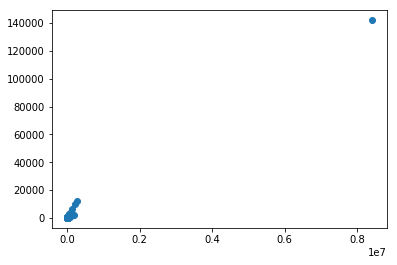

In [8]:
regr = linear_model.LinearRegression()
y = filter_df["Property\ncrime"]
x = filter_df[["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery"]]

plt.scatter(filter_df["Population"], y)

In [9]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(regr.score(x,y))

0.99344854357257


In [11]:
filter_df["Population2"]= filter_df["Population"]**2

In [12]:
regr = linear_model.LinearRegression()
y = filter_df["Property\ncrime"]
x = filter_df[["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery", "Population2"]]


In [13]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(regr.score(x,y))

0.9935839631191373


In [15]:
regr.predict(np.array([1000, 1, 1, 1000**2]).reshape(1, -1))

array([755.15610107])

In [16]:
np.array([1000, 1, 1, 1000**2]).shape

(4,)

In [17]:
np.array([1000, 1, 1, 1000**2]).reshape(1, -1).shape

(1, 4)

In [18]:
n = 1000

In [19]:
p = 10

In [20]:
X = np.random.normal(size=n * p).reshape((n, p))

In [21]:
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

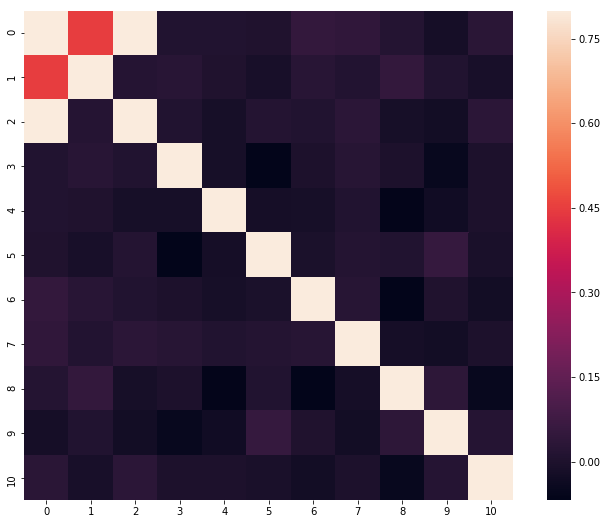

In [22]:
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

R-squared regression: 0.8380951677084627


In [25]:
pls1 = PLSRegression(n_components=3)

In [26]:
pls1.fit(X, y)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

In [27]:
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.8380950296783435


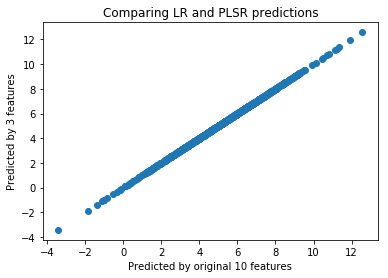

In [28]:
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()